# Neural Network MLP


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.utils import shuffle
import numpy as np
import random
import pickle
import utils
%matplotlib inline

In [53]:
train_images = np.load('train_images.npy')
test_images = np.load('test_images.npy')
train_labels = np.load('train_labels.npy')
test_labels = np.load('test_labels.npy')

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)


(30000, 784)
(5000, 784)
(30000,)
(5000,)


In [54]:
## Scaling data to a range (-1,1)
train_norm = train_images.astype('float32')
test_norm = test_images.astype('float32')
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
train_images_scaled = min_max_scaler.fit_transform(train_norm)
test_images_scaled = min_max_scaler.fit_transform(test_norm)


In [55]:
train_images2, validation_images , train_labels2,  validation_labels  = train_test_split ( train_images_scaled, train_labels, 
                                                                                          test_size=0.1, random_state=41)
print ('Train set:', train_images2.shape,  train_labels2.shape)
print ('Test set:', validation_images.shape,  validation_labels.shape)

Train set: (27000, 784) (27000,)
Test set: (3000, 784) (3000,)


In [56]:
## Divided and scaled data are saved
np.save('train_labels2.npy',train_labels2)
np.save('validation_labels.npy',validation_labels)
np.save('train_images2.npy',train_images2)
np.save('validation_images.npy',validation_images)

In [57]:
## Created empty arrays to store values during process
train_accuracy = [0,0,0,0,0,0,0,0,0,0]
validation_accuracy = [0,0,0,0,0,0,0,0,0,0]
train_loss = [0,0,0,0,0,0,0,0,0,0]
test_accuracy = [0,0,0,0,0,0,0,0,0,0]
weight_layer = np.empty([10,784,16])

 ## Hiden layer sizes (16, 128, 64, 32, 16) Architect 5

In [58]:
for k in range (0,10):  # Algorithm worked for 10 times
    classifier = MLPClassifier(batch_size=500, alpha=0, hidden_layer_sizes=(16, 128, 64, 32, 16), max_iter=100)
    print(k)
    classifier.partial_fit(train_images2, train_labels2, np.unique(train_labels2))
    train_accuracy[k] = classifier.score(train_images2,train_labels2)
    validation_accuracy[k] = classifier.score(validation_images, validation_labels)
    train_loss[k] = classifier.loss_

    train_labels2, train_images2 = shuffle(train_labels2,train_images2) # Data are shuffled 
       

    test_accuracy[k] = classifier.score(test_images,test_labels)    # Test accuracy is calculated
    weight_layer[k] = classifier.coefs_[0]  # Weights of perceptron layer is calculated



0
1
2
3
4
5
6
7
8
9


(784, 16)


C:\Users\HBD\Desktop\oldu\utils.py:385: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


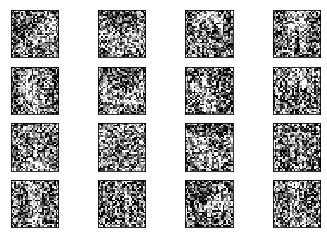

In [59]:
%matplotlib inline

best_test_accuracy = max(test_accuracy)
a = test_accuracy.index(max(test_accuracy))



#average_train_accuracy = sum(train_accuracy) / len(train_accuracy)
#average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
#average_training_loss = sum(train_loss) / len(train_loss)

best_weight =weight_layer[a].reshape(784,16)
print(best_weight.shape)
dictionary_obj = {'name': 'arch_5',
                    'loss_curve': train_loss,
                  'train_acc_curve': test_accuracy,
                  'val_acc_curve': validation_accuracy,
                  'test_acc': best_test_accuracy,
                  'weights': best_weight}


pickle.dump(dictionary_obj, open("part2_arch_5.p", "wb"))

utils.visualizeWeights(best_weight, save_dir= "C:/Users/HBD/Desktop/oldu", filename='input_weights_5')


 ## Hiden layer sizes (16, 32, 64, 128, 64, 32, 16) Architect 

In [60]:
for k in range (0,10):  # Algorithm worked for 10 times
    classifier = MLPClassifier(batch_size=500, alpha=0, hidden_layer_sizes=(16, 32, 64, 128, 64, 32, 16), max_iter=100)
    print(k)
    classifier.partial_fit(train_images2, train_labels2, np.unique(train_labels2))
    train_accuracy[k] = classifier.score(train_images2,train_labels2)
    validation_accuracy[k] = classifier.score(validation_images, validation_labels)
    train_loss[k] = classifier.loss_

    train_labels2, train_images2 = shuffle(train_labels2,train_images2) # Data are shuffled 
       

    test_accuracy[k] = classifier.score(test_images,test_labels)    # Test accuracy is calculated
    weight_layer[k] = classifier.coefs_[0]  # Weights of perceptron layer is calculated


0
1
2
3
4
5
6
7
8
9


(784, 16)


C:\Users\HBD\Desktop\oldu\utils.py:385: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


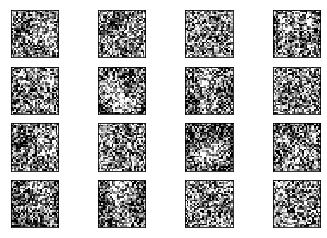

In [61]:
%matplotlib inline

best_test_accuracy = max(test_accuracy)
a = test_accuracy.index(max(test_accuracy))



#average_train_accuracy = sum(train_accuracy) / len(train_accuracy)
#average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
#average_training_loss = sum(train_loss) / len(train_loss)

best_weight =weight_layer[a].reshape(784,16)
print(best_weight.shape)
dictionary_obj = {'name': 'arch_7',
                     'loss_curve': train_loss,
                  'train_acc_curve': test_accuracy,
                  'val_acc_curve': validation_accuracy,
                  'test_acc': best_test_accuracy,
                  'weights': best_weight}


pickle.dump(dictionary_obj, open("part2_arch_7.p", "wb"))

utils.visualizeWeights(best_weight, save_dir= "C:/Users/HBD/Desktop/oldu", filename='input_weights_7')

 ## Hiden layer sizes (16, 128, 16) Architect 

In [62]:
for k in range (0,10):  # Algorithm worked for 10 times
    classifier = MLPClassifier(batch_size=500, alpha=0, hidden_layer_sizes=(16, 128, 16), max_iter=100)
    print(k)
    classifier.partial_fit(train_images2, train_labels2, np.unique(train_labels2))
    train_accuracy[k] = classifier.score(train_images2,train_labels2)
    validation_accuracy[k] = classifier.score(validation_images, validation_labels)
    train_loss[k] = classifier.loss_

    train_labels2, train_images2 = shuffle(train_labels2,train_images2) # Data are shuffled 
       

    test_accuracy[k] = classifier.score(test_images,test_labels)    # Test accuracy is calculated
    weight_layer[k] = classifier.coefs_[0]  # Weights of perceptron layer is calculated


0
1
2
3
4
5
6
7
8
9


(784, 16)


C:\Users\HBD\Desktop\oldu\utils.py:385: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


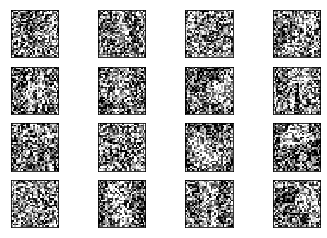

In [63]:
%matplotlib inline

best_test_accuracy = max(test_accuracy)
a = test_accuracy.index(max(test_accuracy))



#average_train_accuracy = sum(train_accuracy) / len(train_accuracy)
#average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
#average_training_loss = sum(train_loss) / len(train_loss)


best_weight =weight_layer[a].reshape(784,16)
print(best_weight.shape)
dictionary_obj = {'name': 'arch_3',
                    'loss_curve': train_loss,
                  'train_acc_curve': test_accuracy,
                  'val_acc_curve': validation_accuracy,
                  'test_acc': best_test_accuracy,
                  'weights': best_weight}

pickle.dump(dictionary_obj, open("part2_arch_3.p", "wb"))

utils.visualizeWeights(best_weight, save_dir= "C:/Users/HBD/Desktop/oldu", filename='input_weights_3')

 ## Hiden layer sizes (16, 128) Architect 

In [64]:
for k in range (0,10):  # Algorithm worked for 10 times
    classifier = MLPClassifier(batch_size=500, alpha=0, hidden_layer_sizes=(16, 128), max_iter=100)
    print(k)
    classifier.partial_fit(train_images2, train_labels2, np.unique(train_labels2))
    train_accuracy[k] = classifier.score(train_images2,train_labels2)
    validation_accuracy[k] = classifier.score(validation_images, validation_labels)
    train_loss[k] = classifier.loss_

    train_labels2, train_images2 = shuffle(train_labels2,train_images2) # Data are shuffled 

    test_accuracy[k] = classifier.score(test_images,test_labels)    # Test accuracy is calculated
    weight_layer[k] = classifier.coefs_[0]  # Weights of perceptron layer is calculated

0
1
2
3
4
5
6
7
8
9


(784, 16)


C:\Users\HBD\Desktop\oldu\utils.py:385: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


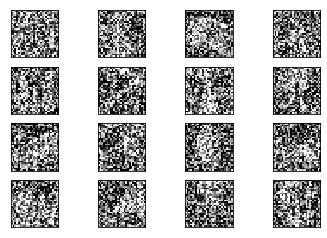

In [65]:
%matplotlib inline

best_test_accuracy = max(test_accuracy)
a = test_accuracy.index(max(test_accuracy))



#average_train_accuracy = sum(train_accuracy) / len(train_accuracy)
#average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
#average_training_loss = sum(train_loss) / len(train_loss)

best_weight =weight_layer[a].reshape(784,16)
print(best_weight.shape)
dictionary_obj = {'name': 'arch_2',
                   'loss_curve': train_loss,
                  'train_acc_curve': test_accuracy,
                  'val_acc_curve': validation_accuracy,
                  'test_acc': best_test_accuracy,
                  'weights': best_weight}

pickle.dump(dictionary_obj, open("part2_arch_2.p", "wb"))

utils.visualizeWeights(best_weight, save_dir= "C:/Users/HBD/Desktop/oldu", filename='input_weights_2')

 ## Hiden layer sizes (128) Architect 

In [66]:
weight_layer = np.empty([10,784,128])

for k in range (0,10):  # Algorithm worked for 10 times
    classifier = MLPClassifier(batch_size=500, alpha=0, hidden_layer_sizes=(128), max_iter=100)
    print(k)
    classifier.partial_fit(train_images2, train_labels2, np.unique(train_labels2))
    train_accuracy[k] = classifier.score(train_images2,train_labels2)
    validation_accuracy[k] = classifier.score(validation_images, validation_labels)
    train_loss[k] = classifier.loss_

    train_labels2, train_images2 = shuffle(train_labels2,train_images2) # Data are shuffled 
       

    test_accuracy[k] = classifier.score(test_images,test_labels)    # Test accuracy is calculated
    weight_layer[k] = classifier.coefs_[0]  # Weights of perceptron layer is calculated

0
1
2
3
4
5
6
7
8
9


In [67]:
%matplotlib inline

best_test_accuracy = max(test_accuracy)
a = test_accuracy.index(max(test_accuracy))



#average_train_accuracy = sum(train_accuracy) / len(train_accuracy)
#average_validation_accuracy = sum(validation_accuracy) / len(validation_accuracy)
#average_training_loss = sum(train_loss) / len(train_loss)


best_weight =weight_layer[a].reshape(784,128)

dictionary_obj = {'name': 'arch_1',
                  'loss_curve': train_loss,
                  'train_acc_curve': test_accuracy,
                  'val_acc_curve': validation_accuracy,
                  'test_acc': best_test_accuracy,
                  'weights': best_weight}

pickle.dump(dictionary_obj, open("part2_arch_1.p", "wb"))

(784, 128)


## All dictionaries

[0.3278065678292401, 0.3788282926453306, 0.32705500729198805, 0.34179732562469745, 0.3450193766381952, 0.31406179365710296, 0.342890899458663, 0.31628225693268247, 0.33401627637219994, 0.3178982039054251]


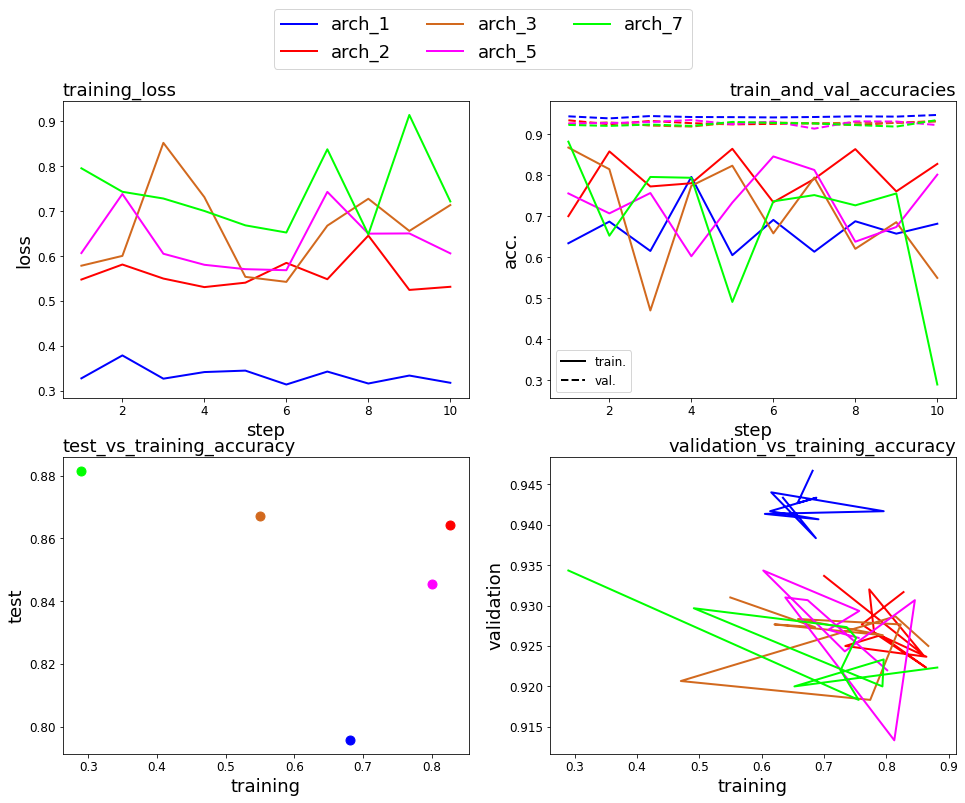

In [69]:
result_arch_1 = pickle.load(open("part2_arch_1.p", "rb"))
result_arch_2 = pickle.load(open("part2_arch_2.p", "rb"))
result_arch_3 = pickle.load(open("part2_arch_3.p", "rb"))
result_arch_5 = pickle.load(open("part2_arch_5.p", "rb"))
result_arch_7 = pickle.load(open("part2_arch_7.p", "rb"))


results = [result_arch_1, result_arch_2, result_arch_3, result_arch_5, result_arch_7]

utils.part2Plots(results, save_dir= "C:/Users/HBD/Desktop/oldu", filename='part2Plots')
